In [1]:
import pandas as pd
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [2]:
train_data.shape, train_data.head()

((250, 302),
    id  target      0      1      2      3      4      5      6      7  ...  \
 0   0     1.0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276  ...   
 1   1     0.0  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  ...   
 2   2     1.0 -0.523 -0.089 -0.348  0.148 -0.022  0.404 -0.023 -0.172  ...   
 3   3     1.0  0.067 -0.021  0.392 -1.637 -0.446 -0.725 -1.035  0.834  ...   
 4   4     1.0  2.347 -0.831  0.511 -0.021  1.225  1.594  0.585  1.509  ...   
 
      290    291    292    293    294    295    296    297    298    299  
 0  0.867  1.347  0.504 -0.649  0.672 -2.097  1.051 -0.414  1.038 -1.065  
 1 -0.165 -1.695 -1.257  1.359 -0.808 -1.624 -0.458 -1.099 -0.936  0.973  
 2  0.013  0.263 -1.222  0.726  1.444 -1.165 -1.544  0.004  0.800 -1.211  
 3 -0.404  0.640 -0.595 -0.966  0.900  0.467 -0.562 -0.254 -0.533  0.238  
 4  0.898  0.134  2.415 -0.996 -1.006  1.378  1.246  1.478  0.428  0.253  
 
 [5 rows x 302 columns])

In [3]:
X_test= test_data.drop(columns=['id'])
test_data.shape, test_data.head()

((19750, 301),
     id      0      1      2      3      4      5      6      7      8  ...  \
 0  250  0.500 -1.033 -1.595  0.309 -0.714  0.502  0.535 -0.129 -0.687  ...   
 1  251  0.776  0.914 -0.494  1.347 -0.867  0.480  0.578 -0.313  0.203  ...   
 2  252  1.750  0.509 -0.057  0.835 -0.476  1.428 -0.701 -2.009 -1.378  ...   
 3  253 -0.556 -1.855 -0.682  0.578  1.592  0.512 -1.419  0.722  0.511  ...   
 4  254  0.754 -0.245  1.173 -1.623  0.009  0.370  0.781 -1.763 -1.432  ...   
 
      290    291    292    293    294    295    296    297    298    299  
 0 -0.088 -2.628 -0.845  2.078 -0.277  2.132  0.609 -0.104  0.312  0.979  
 1 -0.683 -0.066  0.025  0.606 -0.353 -1.133 -3.138  0.281 -0.625 -0.761  
 2 -0.094  0.351 -0.607 -0.737 -0.031  0.701  0.976  0.135 -1.327  2.463  
 3 -0.336 -0.787  0.255 -0.031 -0.836  0.916  2.411  1.053 -1.601 -1.529  
 4  2.184 -1.090  0.216  1.186 -0.143  0.322 -0.068 -0.156 -1.153  0.825  
 
 [5 rows x 301 columns])

In [4]:
X= train_data.drop(columns=['target', 'id'])
Y= train_data['target']

### kNN
I am thinking that kNN would be bad decision becuase: 
1) Test set of size 19750 row and training 250, so overall computation would take 19750 x 250 (x 300 columns), which is really long I guess.
2) Since everything are just continuous data without clear headings, we can't make data preprocessing.

### Later
To solve problem 1) I could use ANN

Another idea I came up with after class of ML DL for text, I want to try kNN with cosine similarity

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [6]:
scores = {}
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, Y)
    score = cross_val_score(knn, X_scaled, Y , cv=5).mean()
    scores[k] = score
    print(f'k={k}, accuracy={score:.4f}')
best_k = max(scores, key=scores.get)
print(f'Best k: {best_k} with accuracy: {scores[best_k]:.4f}')
    

k=1, accuracy=0.5920
k=3, accuracy=0.5800
k=5, accuracy=0.6200
k=7, accuracy=0.6120
k=9, accuracy=0.6280
k=11, accuracy=0.6360
k=13, accuracy=0.6360
k=15, accuracy=0.6360
k=17, accuracy=0.6480
k=19, accuracy=0.6440
k=21, accuracy=0.6680
k=23, accuracy=0.6320
k=25, accuracy=0.6400
k=27, accuracy=0.6560
k=29, accuracy=0.6800
k=31, accuracy=0.6640
k=33, accuracy=0.6560
k=35, accuracy=0.6560
k=37, accuracy=0.6480
k=39, accuracy=0.6480
Best k: 29 with accuracy: 0.6800


In [7]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_scaled, Y)

,n_neighbors,29
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
predictions = knn.predict(X_test_scaled)
predictions

array([1., 1., 1., ..., 1., 1., 1.], shape=(19750,))

In [9]:
df_submission = pd.DataFrame({
    'id': test_data['id'],
    'target': predictions
})
df_submission.head()

,id,target
0,250,1.0
1,251,1.0
2,252,1.0
3,253,1.0
4,254,1.0


In [10]:
df_submission.to_csv('./submissions/knn_submission.csv', index=False)

Accuracy:

k=5, random k number: 0.534 | 0.547

k=29, best cross-validation: 0.534 | 0.536

### Manhattan and Cosine similarity with kNN neigbours

First i used MinMaxScaling but found out that for cosine similarity it's better to use Normalizer 

In [11]:
scores_mnh = {}
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_scaled, Y)
    score = cross_val_score(knn, X_scaled, Y , cv=5).mean()
    scores_mnh[k] = score
best_k_mnh = max(scores_mnh, key=scores_mnh.get)
print(f'Best k: {best_k_mnh} with accuracy: {scores_mnh[best_k_mnh]:.4f}')

scores_cos = {}
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_scaled, Y)
    score = cross_val_score(knn, X_scaled, Y , cv=5).mean()
    scores_cos[k] = score
best_k_cos = max(scores_cos, key=scores_cos.get)
print(f'Best k: {best_k_cos} with accuracy: {scores_cos[best_k_cos]:.4f}')

Best k: 25 with accuracy: 0.6680
Best k: 25 with accuracy: 0.6680


In [12]:
knn_cos = KNeighborsClassifier(n_neighbors=best_k_cos, metric='cosine')
knn_mnh = KNeighborsClassifier(n_neighbors=best_k_mnh, metric='manhattan')

knn_cos.fit(X_scaled, Y)
knn_mnh.fit(X_scaled, Y)

predictions_cos = knn_cos.predict(X_test_scaled)
predictions_mnh = knn_mnh.predict(X_test_scaled)

df_submission_cos = pd.DataFrame({
    'id': test_data['id'],
    'target': predictions_cos
})

df_submission_mnh = pd.DataFrame({
    'id': test_data['id'],
    'target': predictions_mnh
})

df_submission_cos.to_csv('./submissions/knn_cosine_submission.csv', index=False)
df_submission_mnh.to_csv('./submissions/knn_manhattan_submission.csv', index=False)

In [13]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer("l2")
X_normalized = normalizer.fit_transform(X)
X_test_normalized = normalizer.transform(X_test)

In [14]:
scores_norm_cos = {}
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_normalized, Y)
    score = cross_val_score(knn, X_normalized, Y , cv=5).mean()
    scores_norm_cos[k] = score
best_k_norm_cos = max(scores_norm_cos, key=scores_norm_cos.get)
print(f'Best k: {best_k_norm_cos} with accuracy: {scores_norm_cos[best_k_norm_cos]:.4f}')

Best k: 27 with accuracy: 0.6640


In [15]:
knn_norm_cos = KNeighborsClassifier(n_neighbors=best_k_norm_cos, metric='cosine')
knn_norm_cos.fit(X_normalized, Y)
predictions_norm_cos = knn_norm_cos.predict(X_test_normalized)
df_submission_norm_cos = pd.DataFrame({
    'id': test_data['id'],
    'target': predictions_norm_cos
}) 
df_submission_norm_cos.to_csv('./submissions/knn_normalized_cosine_submission.csv', index=False)

Cosine: 0.544 | 0.549 (MinMaxScaling)

Cosine: 0.535 | 0.551 (Normalized)

Manhattan: 0.540 | 0.539

### ANN (Approximate nearest neighbour)
It would drop accuracy, but would try

In [ ]:
from pynndescent import NNDescent

def build_ann_index(training_norm, ind_size=20):
    Xn = training_norm.astype('float32')
    index = NNDescent(Xn, n_neighbors=ind_size, metric='cosine', random_state=42)
    index.prepare()
    # It builds an approximate neighbor graph with 20 neigbotrs (more = slower but better quality)
    return index

In [ ]:
import numpy as np

def ANN_predict(normalized_test_data, index, Y, k):
    inds, dists = index.query(normalized_test_data, k=k)
    # For each test point, searches for k approximate nearest neighbors in the training set.

    y= Y.values.astype(np.int32)

    eps = 1e-9
    y_pred =[]
    for nbrs, dd in zip(inds, dists): # Iterate over each test point's neighbors and distances
        scores = {}
        for j, dist in zip(nbrs, dd): # Iterate over each neighbor index and distance
            lab = y[j]
            w = 1.0 / (dist + eps)
            scores[lab] = scores.get(lab, 0.0) + w
        y_pred.append(max(scores.items(), key=lambda kv: kv[1])[0])
    y_pred = np.array(y_pred)
    return y_pred

In [ ]:
index = build_ann_index(X_normalized)
df_ann = pd.DataFrame({
    'id': test_data['id'],
    'target': ANN_predict(X_test_normalized, index, Y, k=5)
})
df_ann.to_csv('./submissions/ann.csv', index=False)

Public: 0.559

Private: 0.545

With cross validation

In [22]:
from sklearn.model_selection import KFold

# --- Cross-validation method ---
def ann_cross_val (k, X, Y, indx_size=20):
    # --- Cross-validation setup ---
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = Y.iloc[train_idx], Y.iloc[val_idx]

        X_tr = X_tr.astype('float32')
        X_val = X_val.astype('float32')
        
        y_tr = y_tr.values.astype(np.int32)
        
        # Build NNDescent index on training fold
        index = build_ann_index(X_tr, indx_size)

        # Query validation points
        inds, dists = index.query(X_val, k=k)
        
        # Weighted voting
        eps = 1e-9
        y_pred = []
        for nbrs, dd in zip(inds, dists):
            scores_dict = {}
            for j, dist in zip(nbrs, dd):
                lab = y_tr[j]   # use training fold labels
                w = 1.0 / (dist + eps)
                scores_dict[lab] = scores_dict.get(lab, 0.0) + w
            y_pred.append(max(scores_dict.items(), key=lambda kv: kv[1])[0])
        
        y_pred = np.array(y_pred)
        
        # Calculate accuracy for this fold
        acc = np.mean(y_pred == y_val)
        scores.append(acc)

    return float(np.mean(scores)), float(np.std(scores))

scores={}
for k in range(1, 40, 2):
    score, std = ann_cross_val(k, X, Y)
    
    scores[k] = score
best_k_ann = max(scores, key=scores.get)
print(f'Best k: {best_k_ann} with accuracy: {scores[best_k_ann]:.4f}')


Best k: 27 with accuracy: 0.6680


In [31]:
df_ann = pd.DataFrame({
    'id': test_data['id'],
    'target': ANN_predict(X_test_normalized, index, Y, k=best_k_ann)
})
df_ann.to_csv('./submissions/ann_cross_val.csv', index=False)

Public: 0.564

Private: 0.546

### Testing different indexes with cross-validation

In [26]:
index_sizes = [5, 10, 20, 40, 80]
k_values = range(1, 40, 2)

results = []  # will store (index_size, k, mean_acc, std_acc)

for ind_size in index_sizes:
    print(f"\n=== Testing index_neighbors = {ind_size} ===")
    for k in k_values:
        mean_acc, std_acc = ann_cross_val(
            k=k,
            X=X,
            Y=Y,
            indx_size=ind_size
        )
        results.append((ind_size, k, mean_acc, std_acc))
        print(f"  k={k:2d}  acc={mean_acc:.4f} ± {std_acc:.4f}")

# Convert to DataFrame for inspection
results_df = pd.DataFrame(results, columns=["index_neighbors", "k", "mean_acc", "std_acc"])

# Find the best combination
best_row = results_df.loc[results_df["mean_acc"].idxmax()]
print(f"\nBest configuration → index_neighbors={best_row.index_neighbors}, "
      f"k={best_row.k}, accuracy={best_row.mean_acc:.4f}")


=== Testing index_neighbors = 5 ===
  k= 1  acc=0.5320 ± 0.0652
  k= 3  acc=0.6000 ± 0.0283
  k= 5  acc=0.6240 ± 0.0557
  k= 7  acc=0.6240 ± 0.0763
  k= 9  acc=0.5960 ± 0.0709
  k=11  acc=0.6040 ± 0.0880
  k=13  acc=0.6480 ± 0.0640
  k=15  acc=0.6600 ± 0.0607
  k=17  acc=0.6720 ± 0.0601
  k=19  acc=0.6480 ± 0.0371
  k=21  acc=0.6760 ± 0.0388
  k=23  acc=0.6800 ± 0.0456
  k=25  acc=0.6800 ± 0.0551
  k=27  acc=0.6840 ± 0.0637
  k=29  acc=0.6840 ± 0.0585
  k=31  acc=0.6680 ± 0.0574
  k=33  acc=0.6720 ± 0.0574
  k=35  acc=0.6600 ± 0.0566
  k=37  acc=0.6560 ± 0.0637
  k=39  acc=0.6560 ± 0.0585

=== Testing index_neighbors = 10 ===
  k= 1  acc=0.5440 ± 0.0662
  k= 3  acc=0.6040 ± 0.0320
  k= 5  acc=0.5800 ± 0.0632
  k= 7  acc=0.6280 ± 0.0640
  k= 9  acc=0.6440 ± 0.0388
  k=11  acc=0.6360 ± 0.0512
  k=13  acc=0.6400 ± 0.0420
  k=15  acc=0.6320 ± 0.0531
  k=17  acc=0.6280 ± 0.0776
  k=19  acc=0.6360 ± 0.0907
  k=21  acc=0.6440 ± 0.0731
  k=23  acc=0.6440 ± 0.0720
  k=25  acc=0.6560 ± 0.0774
 

In [27]:
results_df

,index_neighbors,k,mean_acc,std_acc
0,5,1,0.532,0.065238
1,5,3,0.600,0.028284
2,5,5,0.624,0.055714
3,5,7,0.624,0.076315
4,5,9,0.596,0.070880
...,...,...,...,...
95,80,31,0.664,0.081388
96,80,33,0.660,0.090333
97,80,35,0.660,0.071554
98,80,37,0.656,0.076315


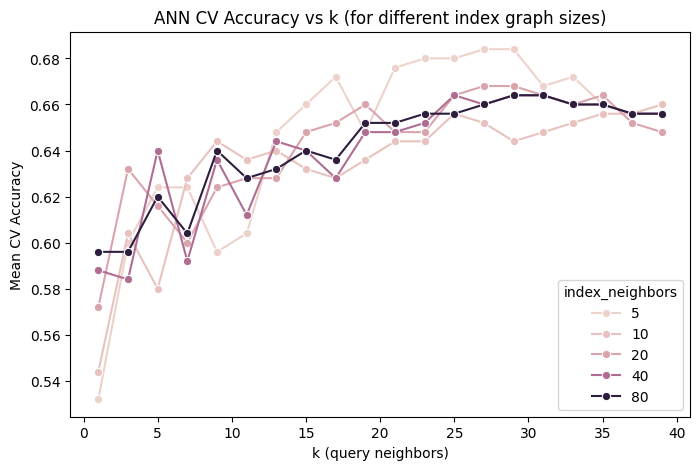

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.lineplot(data=results_df, x="k", y="mean_acc", hue="index_neighbors", marker="o")
plt.title("ANN CV Accuracy vs k (for different index graph sizes)")
plt.xlabel("k (query neighbors)")
plt.ylabel("Mean CV Accuracy")
plt.legend(title="index_neighbors")
plt.show()

In [29]:
df_ann_best = pd.DataFrame({
    'id': test_data['id'],
    'target': ANN_predict(X_test_normalized, build_ann_index(X_normalized, ind_size=5), Y, k=27)
})
df_ann_best.to_csv('./submissions/ann_best.csv', index=False)

Private: 0.545

Public: 0.541